<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-du-corpus" data-toc-modified-id="Import-du-corpus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import du corpus</a></span></li><li><span><a href="#Séparation-définitive-train-/-val-/-test-set" data-toc-modified-id="Séparation-définitive-train-/-val-/-test-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Séparation définitive train / val / test set</a></span></li><li><span><a href="#Analyse-du-corpus-(train-set)" data-toc-modified-id="Analyse-du-corpus-(train-set)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse du corpus (train set)</a></span><ul class="toc-item"><li><span><a href="#Tags" data-toc-modified-id="Tags-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tags</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-tags-non-filtrés-du-val-set-et-du-test-set" data-toc-modified-id="Suppression-des-tags-non-filtrés-du-val-set-et-du-test-set-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Suppression des tags non filtrés du val set et du test set</a></span></li><li><span><a href="#Suppression-des-posts-sans-tags-du-val-set-et-du-test-set" data-toc-modified-id="Suppression-des-posts-sans-tags-du-val-set-et-du-test-set-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Suppression des posts sans tags du val set et du test set</a></span></li></ul></li><li><span><a href="#Post" data-toc-modified-id="Post-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Post</a></span><ul class="toc-item"><li><span><a href="#Corpus-adapté-doc2vec" data-toc-modified-id="Corpus-adapté-doc2vec-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Corpus adapté doc2vec</a></span></li><li><span><a href="#Corpus-adapté-Seq2Seq" data-toc-modified-id="Corpus-adapté-Seq2Seq-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Corpus adapté Seq2Seq</a></span></li></ul></li><li><span><a href="#Sauvegarde-corpus-filtré" data-toc-modified-id="Sauvegarde-corpus-filtré-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Sauvegarde corpus filtré</a></span></li></ul></li><li><span><a href="#Longueur-des-documents-des-corpus" data-toc-modified-id="Longueur-des-documents-des-corpus-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Longueur des documents des corpus</a></span></li><li><span><a href="#Occurences-Post-/-Tags" data-toc-modified-id="Occurences-Post-/-Tags-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Occurences Post / Tags</a></span><ul class="toc-item"><li><span><a href="#Construction-matrice-des-occurences" data-toc-modified-id="Construction-matrice-des-occurences-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Construction matrice des occurences</a></span></li><li><span><a href="#Utilisation-matrice-des-occurences" data-toc-modified-id="Utilisation-matrice-des-occurences-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Utilisation matrice des occurences</a></span></li><li><span><a href="#Essai-rapide-de-faisabilité-prédiction-(Softmax)" data-toc-modified-id="Essai-rapide-de-faisabilité-prédiction-(Softmax)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Essai rapide de faisabilité prédiction (Softmax)</a></span></li></ul></li></ul></div>

In [1]:
import os
import pandas as pd
import glob
import numpy as np
import pickle
import pickle5
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from gensim import corpora
from gensim import matutils

import seaborn as sns
sns.set()
sns.set_style("white")

#  %xdel var : détruit variable et libère la mémoire

# Import du corpus

In [2]:
#read the pickle file
picklefile = open('PickleData/corpus.pkl', 'rb')
#unpickle the dataframe
df_data = pickle5.load(picklefile)
#close file
picklefile.close()

print("Notre jeu de données comporte {} de lignes et {} de colonnes".format(df_data.shape[0], df_data.shape[1]))

Notre jeu de données comporte 199995 de lignes et 5 de colonnes


In [3]:
#Les 10 premières lignes de notre jeux de données
df_data.head(10)

,Title,Body,Tags,Text,raw
337049,How do I make a shrinkable scrollbar?,<p><strong>What I want:</strong> </p>\n\n<pre...,"[html, css, scrollbars]","[make, shrinkable, scrollbar, want, notice, sh...",how do i make a shrinkable scrollbar what i wa...
478707,"Do you prefer ""if (var)"" or ""if (var != 0)""?",<p>I've been programming in C-derived language...,"[c, perl, coding-style]","[prefer, var, var, -PRON-, have, program, cder...",do you prefer if var or if var 0 ive been...
191651,SQL ServerReporting Services - Export report t...,<p>I have a report which has a document map fo...,"[c#, asp.net, reporting-services]","[sql, serverreporte, services, export, report,...",sql serverreporting services export report to...
228069,WIX: How can I register a new ISAPI Extension ...,"<p>I've seen the <a href=""http://wix.sourcefor...","[installation, wix, windows-installer, isapi]","[wix, register, new, isapi, extension, script,...",wix how can i register a new isapi extension o...
26946,C# - Tetris clone - Can't get block to respond...,<p>I'm working on programming a Tetris game in...,"[c#, keydown, arrow-keys]","[c, tetris, clone, can, not, get, block, respo...",c# tetris clone cant get block to respond pr...
427083,Auto-rotating views and UIDevice interface not...,<p>I have trouble with auto-rotating interface...,"[iphone, ipad, uiviewcontroller]","[autorotate, view, uidevice, interface, notifi...",autorotating views and uidevice interface noti...
231319,how to set current user name in SharePoint?,<p>I am using SharePiont Server 2007 Enterpris...,"[c#, asp.net, .net, visual-studio-2008, sharep...","[set, current, user, name, sharepoint, use, sh...",how to set current user name in sharepoint i a...
444393,Bidi associations and NHibernate mapping,<p>I have classes BidiParent and BidiChildList...,"[c#, nhibernate, linq-to-nhibernate]","[bidi, association, nhibernate, mapping, class...",bidi associations and nhibernate mapping i hav...
464623,Textbox anchored to a form on all 4 sides not ...,<p>I'm running into a problem trying to anchor...,"[visual-studio-2005, user-controls, .net-2.0, ...","[textbox, anchor, form, side, display, properl...",textbox anchored to a form on all 4 sides not ...
454863,Gridview sorting challenge when moving from Wi...,<p>I have a problem with Gridview sorting that...,"[asp.net, vb.net, gridview]","[gridview, sort, challenge, move, winform, asp...",gridview sorting challenge when moving from wi...


# Séparation définitive train / val / test set

Nous allons scinder notre jeu de données en 60% pour le training set, 20% pour le testing set et enfin 20% pour le validation set.

In [4]:
# X_train 60%
X_train, X_temp, Y_train, Y_temp = train_test_split(
    df_data[['raw', 'Text']],
    df_data[['Tags']],
    test_size=0.4,
    shuffle=True,
    random_state=1)

In [5]:
# X_val 20%, X_test 20%
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp,
    Y_temp,
    test_size=0.5,
    shuffle=True,
    random_state=1)
%xdel X_temp
%xdel Y_temp

In [6]:
print('La base de données Train comporte {} et {} colonnes'.format(X_train.shape[0], X_train.shape[1]))
print('La base de données Val comporte {} et {} colonnes'.format(X_val.shape[0], X_val.shape[1]))
print('La base de données Test comporte {} et {} colonnes'.format(X_test.shape[0], X_test.shape[1]))

La base de données Train comporte 119997 et 2 colonnes
La base de données Val comporte 39999 et 2 colonnes
La base de données Test comporte 39999 et 2 colonnes


In [7]:
# Savegardons nos jeux de données sur notre ordinateur local
X_train.to_pickle('train/X_train.pkl')
Y_train.to_pickle('train/Y_train.pkl')
X_val.to_pickle('val/X_val.pkl')
Y_val.to_pickle('val/Y_val.pkl')
X_test.to_pickle('test/X_test.pkl')
Y_test.to_pickle('test/Y_test.pkl')

# Analyse du corpus (train set)

A partir de ce point, l'ensemble du travail effectué sur le corpus (analyse, tri) est réalisé uniquement sur le train set afin d'éviter une fuite de données.

In [8]:
# Classe pour manipuler facilement un corpus gensim
class MyCorpus(object):
    def __init__(self, df_text):
        self.df_text = df_text
        self.dictionary = corpora.Dictionary(self.df_text.values)
        token_freq = {self.dictionary[key]: (value, self.dictionary.dfs[key])
                      for key, value in self.dictionary.cfs.items()}
        self.df_freq = pd.DataFrame.from_dict(
            token_freq, orient='index', columns=['cfs', 'dfs'])
        self.df_freq = self.df_freq.sort_values(by='cfs', ascending=False)
        self.df_filter_freq = self.df_freq.copy()
        self.tokens = [token for token in self.dictionary.values()]
        print('Dictionnaire créé : {} mots'.format(len(self.dictionary)))

    def filter_dict(self, no_below=1, no_above=1., keep_n=None):
        self.dictionary.filter_extremes(
            no_below=no_below, no_above=no_above, keep_n=keep_n)
        self.tokens = [token for token in self.dictionary.values()]
        self.df_filter_freq = self.df_freq.loc[self.tokens].sort_values(
            by='cfs', ascending=False)
        print('Dictionnaire filtré : {} mots'.format(len(self.dictionary)))

    def get_bow(self):
        return [self.dictionary.doc2bow(text) for text in self.df_text.values]

    def get_low_freq(self, count):
        print('\nTokens les moins fréquents :')
        print(list(self.df_filter_freq.tail(count).index.values))

    def get_words(self):
        return self.tokens

    def plot_freq(self, count):
        df_freq_to_plot = self.df_filter_freq.head(count)
        ind = np.arange(df_freq_to_plot.shape[0])
        width = 0.35
        plt.figure(figsize=(15, 8))
        plt.bar(ind-width/2, df_freq_to_plot['cfs'], width, color='g',
                label='cfs : occurence du token parmi tous les documents')
        plt.bar(ind+width/2, df_freq_to_plot['dfs'], width, color='b',
                label='dfs : nombre de documents contenant le token')
        plt.xlabel('Tokens ')
        plt.xticks(ind, df_freq_to_plot.index.values, rotation=90)
        plt.ylabel('Occurence')
        plt.title('{} tokens les plus fréquents (cfs)'.format(count))
        plt.legend()

    def get_frequency(self):
        return self.df_filter_freq

    def get_corpus(self):
        return self.df_text.apply(self.__extract_token_from_text)

    def __extract_token_from_text(self, text):
        words = [x for x in text if x in self.tokens]
        return words

    def __iter__(self):
        for _, words in self.df_text.items():
            yield self.dictionary.doc2bow(words)

## Tags

Dictionnaire créé : 13866 mots


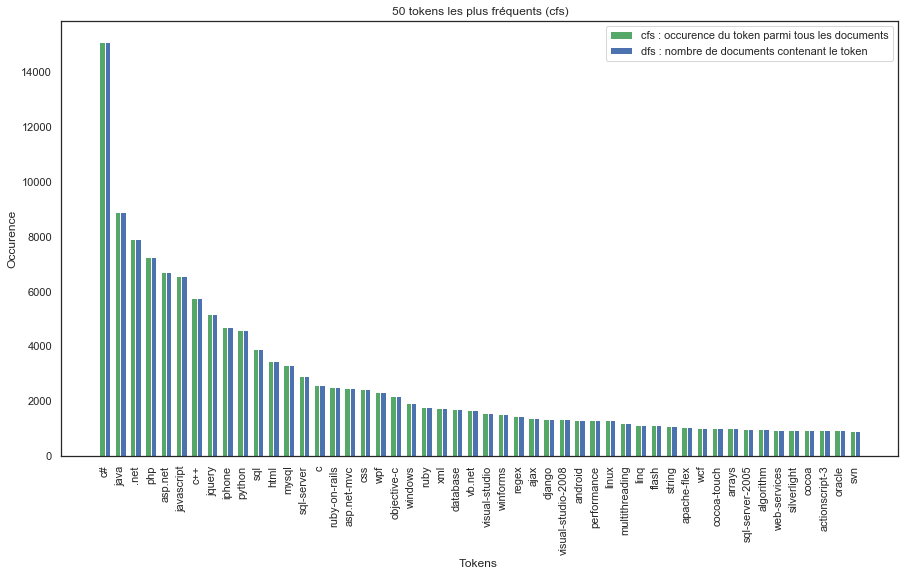

In [9]:
tags_corpus = MyCorpus(Y_train['Tags'])
tags_corpus.plot_freq(50)

Le nombre de tags total est de 13866. Ce qui est très élevé.  Afin de pouvoir réaliser un algorithme de prédiction efficace, le nombre de tags va être réduit arbitrairement à 100.

In [10]:
tags_corpus.filter_dict(keep_n=100)
print('Tags à prédire : \n-----------------')
print(tags_corpus.get_words())

Dictionnaire filtré : 100 mots
Tags à prédire : 
-----------------
['database', 'forms', 'html', 'php', 'c++', 'string', 'arrays', 'c', 'python', 'swing', 'user-interface', 'hibernate', 'java', 'android', 'oracle', 'sql', 'c#', 'perl', 'actionscript-3', 'apache-flex', 'events', 'iphone', 'objective-c', 'ruby', 'ruby-on-rails', '.net', 'wcf', 'performance', 'linux', 'spring', 'javascript', 'visual-studio-2008', 'sql-server', 'cocoa-touch', 'caching', 'django', 'jquery', 'asp.net', 'entity-framework', 'vb.net', 'version-control', 'visual-c++', 'asp.net-mvc', 'validation', 'regex', 'windows', 'winforms', 'http', 'web-services', 'design-patterns', 'sql-server-2005', 'git', 'security', 'tsql', 'apache', 'file', 'macos', 'sharepoint', 'mysql', 'css', 'language-agnostic', 'image', 'visual-studio', 'sql-server-2008', 'internet-explorer', 'multithreading', 'database-design', 'debugging', 'ajax', 'generics', 'wpf', 'winapi', 'excel', 'unix', 'oop', 'nhibernate', 'linq', 'linq-to-sql', 'cocoa', '

In [11]:
Y_train['tags_filtered'] = tags_corpus.get_corpus()
Y_train.head(10)

,Tags,tags_filtered
195918,"[html, database, forms, cookies]","[html, database, forms]"
371461,"[gwt, guava]",[]
495592,"[php, development-environment]",[php]
451531,"[c++, string]","[c++, string]"
385306,"[assembly, x86, nasm]",[]
542821,"[c, arrays, pointers]","[c, arrays]"
549984,"[python, librsvg, rsvg]",[python]
177132,"[user-interface, swing, scala]","[user-interface, swing]"
247434,[spring-webflow],[]
277326,"[python, visualization, graphviz, pydot]",[python]


In [12]:
# save tokens
tokens = pd.Series(tags_corpus.dictionary.id2token).sort_index()
with open('PickleData/tokens_tags_filtered.pkl', 'wb') as f:
    pickle.dump(tokens, f, pickle.HIGHEST_PROTOCOL)

# free tags_corpus
%xdel tags_corpus

### Suppression des tags non filtrés du val set et du test set

In [13]:
set_tokens_to_keep = set(tokens)

def remove_tags(tags):
    return list(set(tags) & set_tokens_to_keep)

In [14]:
# Val set
Y_val['tags_filtered'] = Y_val['Tags'].apply(remove_tags)
#print(Y_val.head())

In [15]:
# Test set
Y_test['tags_filtered'] = Y_test['Tags'].apply(remove_tags)
#print(Y_test.head())

### Suppression des posts sans tags du val set et du test set

In [16]:
def drop_row_without_tags(df_X, df_Y):
    print('Nombre de post avant suppression : {}'.format(df_X.shape[0]))
    # drop row without tags
    zeros_count = 0
    index_to_drop = []

    for index, row in df_Y.iterrows():
        if len(row['tags_filtered']) == 0:
            zeros_count += 1
            index_to_drop.append(index)

    tag = df_Y.drop(index=index_to_drop)
    post = df_X.drop(index=index_to_drop)

    print('Nombre de post supprimés : {}'.format(zeros_count))
    print('Nombre de post restant : {}'.format(post.shape[0]))
    
    return post, tag


print('Train set :')
X_train, Y_train = drop_row_without_tags(X_train, Y_train)
print()
print('Val set :')
X_val, Y_val = drop_row_without_tags(X_val, Y_val)
print()
print('Test set :')
X_test, Y_test = drop_row_without_tags(X_test, Y_test)

Train set :
Nombre de post avant suppression : 119997
Nombre de post supprimés : 16772
Nombre de post restant : 103225

Val set :
Nombre de post avant suppression : 39999
Nombre de post supprimés : 5522
Nombre de post restant : 34477

Test set :
Nombre de post avant suppression : 39999
Nombre de post supprimés : 5517
Nombre de post restant : 34482


## Post

In [17]:
post_corpus = MyCorpus(X_train['Text'])

Dictionnaire créé : 238700 mots


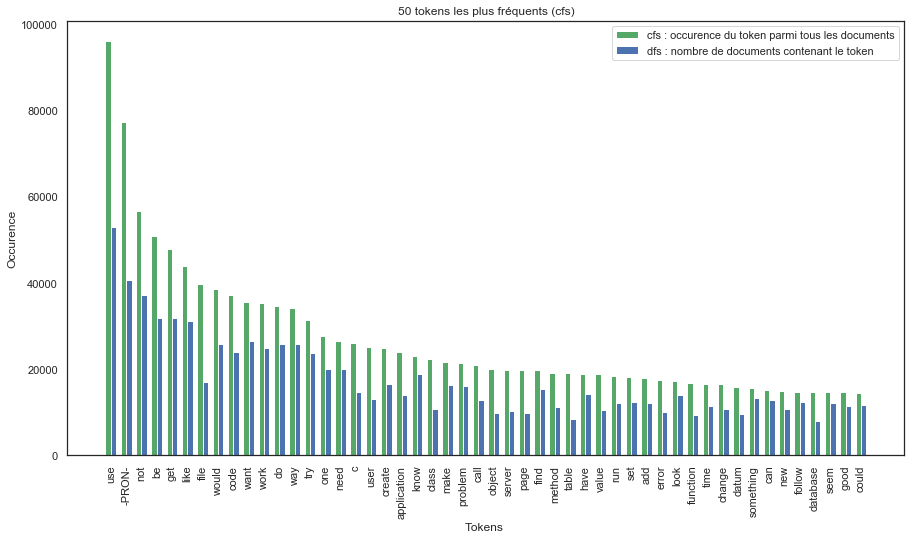

In [18]:
#Plot the first 50 tokens the most frequently seen in the corpus
post_corpus.plot_freq(50)

In [19]:
# The 50 tokens the least seen in the corpus
post_corpus.get_low_freq(50)


Tokens les moins fréquents :
['problementity', 'computerupdatethe', 'usany', 'lucidly', 'topof', 'placewidget', 'asexpecte', 'myselfwe', 'gitive', 'workingnotice', 'busyness', 'equivalentthankspete', 'pushviewcontrolleranotherviewcontroller', 'nowok', 'initwithbarbuttonsystemitemuibarbuttonsystemitemdone', 'selfnavigationcontrollernavigationitemrightbarbuttonitem', 'triplechecked', 'photostag', 'postschapter', 'thinkerror', 'fk_sitecontent_tagsphotos_sitecontent_photos', 'photosphotodetail', 'tagidha', 'googlefui', 'requestedthis', 'buttonpls', 'ieorshould', 'respectivly', 'methodsd', 'methodsb', 'loadpagestatefrompersistencemediumb', 'situatuion', 'sessionpagestatepersister', 'loadpagestatefrompersistencemedium', 'widgetsthe', 'widgetideally', 'backgroundbecause', 'validationhowever', 'codesub', 'cvalidate', 'validationworkercancelasync', 'onehundredth', 'validationworkerrunworkerasync', 'subit', 'cancelasync', 'isbusy', 'markthe', 'thisthanksalso', 'wilh', 'directorymany']


### Corpus adapté doc2vec

Dans ce cas, on cherche à garder les tokens porteur de sens et éliminer les autres :
- tokens trop fréquents dans les posts (présent dans au moins 1 post sur 10)
- tokens presque jamais rencontrés (rencontrés moins de 50 fois dans l'ensemble des posts)

Dictionnaire filtré : 4187 mots


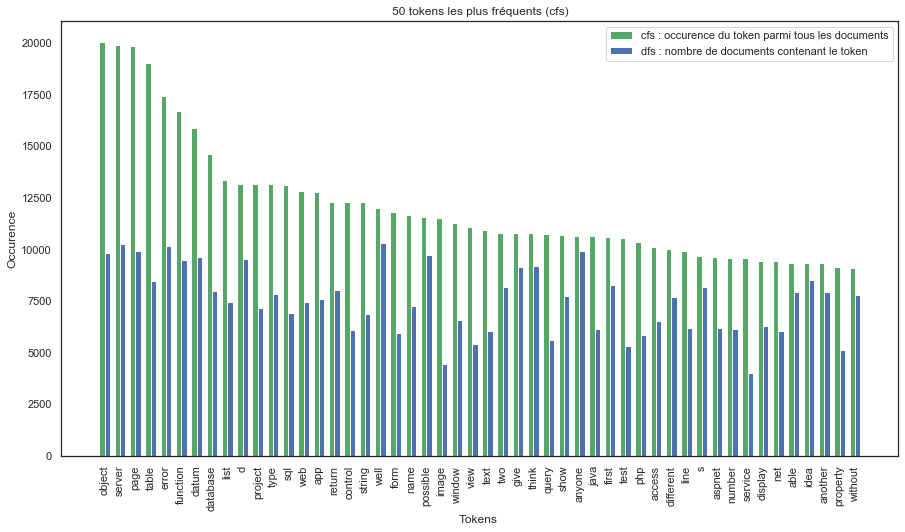

In [20]:
post_corpus.filter_dict(no_below=50, no_above=0.1)  # 50 0.1
post_corpus.plot_freq(50)

In [21]:
post_corpus.get_low_freq(50)


Tokens les moins fréquents :
['sitei', 'thisplease', 'useri', 'isbut', 'onthe', 'applicationthank', 'managing', 'itcan', 'failing', 'asis', 'thisas', 'egi', 'finished', 'albeit', 'directoryi', 'created', 'etcis', 'accepted', 'sever', 'dive', 'disclaimer', 'examplethank', 'haveand', 'likeit', 'javai', 'etchow', 'noticed', 'exceptionthe', 'dothank', 'folderi', 'ideathank', 'suggestionsthank', 'wherein', 'alli', 'questionis', 'thisupdate', 'inputte', 'withbut', 'programi', 'thisa', 'throwing', 'sobut', 'aforementioned', 'modeli', 'objectthe', 'issuethank', 'pagehow', 'casei', 'errorthis', 'shown']


In [22]:
X_train['text_small'] = post_corpus.get_corpus()
X_train.head()

,raw,Text,text_small
195918,how to store parts of formdata when theyre on ...,"[store, part, formdata, -PRON-, be, separate, ...","[store, part, separate, page, whenever, prepar..."
495592,which tools should no php web developer live w...,"[tool, php, web, developer, live, without, lot...","[tool, php, web, developer, live, without, lot..."
451531,long strings with newlines i have seen c# code...,"[long, string, newline, see, c, code, use, tel...","[long, string, newline, tell, compiler, string..."
542821,about character pointers in c consider this de...,"[character, pointers, c, consider, definitiona...","[character, pointers, consider, point, area, m..."
549984,how to install pythonrsvg without pythongnome2...,"[install, pythonrsvg, without, pythongnome, de...","[install, without, desktop, ubuntu, support, p..."


In [23]:
# save tokens
bow = post_corpus.get_bow()
with open('PickleData/bow_small.pkl', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)

tokens = pd.Series(post_corpus.dictionary.id2token).sort_index()
with open('PickleData/tokens_small.pkl', 'wb') as f:
    pickle.dump(tokens, f, pickle.HIGHEST_PROTOCOL)

# free post_corpus
%xdel post_corpus

### Corpus adapté Seq2Seq

Dans ce cas, on cherche à conserver les relations entre les tokens composant le post. Il semble donc risquer d'éliminer les tokens rencontrés fréquemment : ils peuvent représenter des mots de liaisons ou des mots de négation indispensable à la compréhension du sens du post. A l'inverse, les tokens peu fréquents semblent pouvoir être éliminés.

La détection de topics utilisera ce corpus.

In [24]:
post_corpus = MyCorpus(X_train['Text'])

Dictionnaire créé : 238700 mots


Dictionnaire filtré : 7862 mots


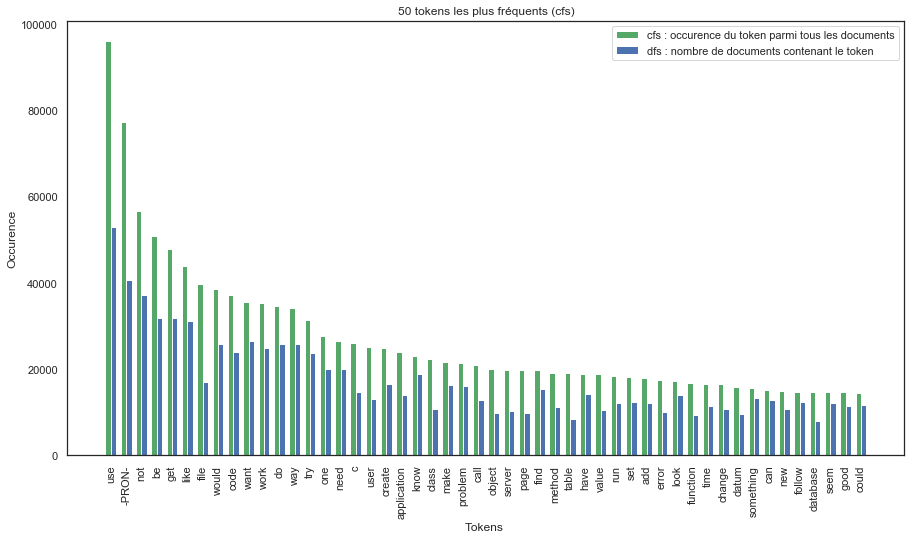

In [25]:
post_corpus.filter_dict(no_below=20)  # 20
post_corpus.plot_freq(50)

In [26]:
post_corpus.get_low_freq(50)


Tokens les moins fréquents :
['onehow', 'filesso', 'mehere', 'onewhat', 'fragile', 'resultthank', 'objecthow', 'sourcei', 'configured', 'haveis', 'examplehere', 'javascriptthe', 'javathe', 'itthere', 'reduction', 'withit', 'inis', 'thathow', 'dohow', 'thisyou', 'uncomfortable', 'responsethe', 'oneif', 'databasethank', 'welcomethanks', 'orderi', 'changesi', 'thisam', 'uninitialize', 'suboptimal', 'objectin', 'itselfthe', 'saved', 'diving', 'timesi', 'dosent', 'pageand', 'objecthere', 'searches', 'products', 'columnthe', 'itas', 'classes', 'pagewhat', 'testthe', 'alloc_init', 'fineso', 'classim', 'hereso', 'serverwhen']


In [27]:
X_train['text_large'] = post_corpus.get_corpus()
X_train.head(5)

,raw,Text,text_small,text_large
195918,how to store parts of formdata when theyre on ...,"[store, part, formdata, -PRON-, be, separate, ...","[store, part, separate, page, whenever, prepar...","[store, part, -PRON-, be, separate, page, when..."
495592,which tools should no php web developer live w...,"[tool, php, web, developer, live, without, lot...","[tool, php, web, developer, live, without, lot...","[tool, php, web, developer, live, without, lot..."
451531,long strings with newlines i have seen c# code...,"[long, string, newline, see, c, code, use, tel...","[long, string, newline, tell, compiler, string...","[long, string, newline, see, c, code, use, tel..."
542821,about character pointers in c consider this de...,"[character, pointers, c, consider, definitiona...","[character, pointers, consider, point, area, m...","[character, pointers, c, consider, see, point,..."
549984,how to install pythonrsvg without pythongnome2...,"[install, pythonrsvg, without, pythongnome, de...","[install, without, desktop, ubuntu, support, p...","[install, without, desktop, ubuntu, need, supp..."


In [28]:
# save tokens
bow = post_corpus.get_bow()
with open('PickleData/bow_large.pkl', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)

tokens = pd.Series(post_corpus.dictionary.id2token).sort_index()
with open('PickleData/tokens_large.pkl', 'wb') as f:
    pickle.dump(tokens, f, pickle.HIGHEST_PROTOCOL)

# free post_corpus
%xdel post_corpus

## Sauvegarde corpus filtré

In [29]:
# save
X_train.to_pickle('train/X_train_filtre.pkl')
Y_train.to_pickle('train/Y_train_filtre.pkl')
X_val.to_pickle('val/X_val_filtre.pkl')
Y_val.to_pickle('val/Y_val_filtre.pkl')
X_test.to_pickle('test/X_test_filtre.pkl')
Y_test.to_pickle('test/Y_test_filtre.pkl')

# Longueur des documents des corpus

In [30]:
#read the pickle file
picklefile = open('train/X_train_filtre.pkl', 'rb')
#unpickle the dataframe
post = pickle5.load(picklefile)
#close file
picklefile.close()

#read the pickle file
picklefile = open('train/Y_train_filtre.pkl', 'rb')
#unpickle the dataframe
tag = pickle5.load(picklefile)
#close file
picklefile.close()

In [31]:
def plot_posts_length(df_corpus, corpus_names, bins=50):
    plt.figure(figsize=(15, 4))
    for i, corpus_name in enumerate(corpus_names):
        count_len = [len(item) for _, item in df_corpus[corpus_name].items()]
        plt.subplot(1, 3, i+1)
        plt.hist(count_len, bins=bins)
        plt.title('{}, max : {}'.format(corpus_name, max(count_len)))
        if i == 0:
            plt.ylabel('Nombre de posts')
        plt.xlabel('Nombre de tokens')
        plt.tight_layout()

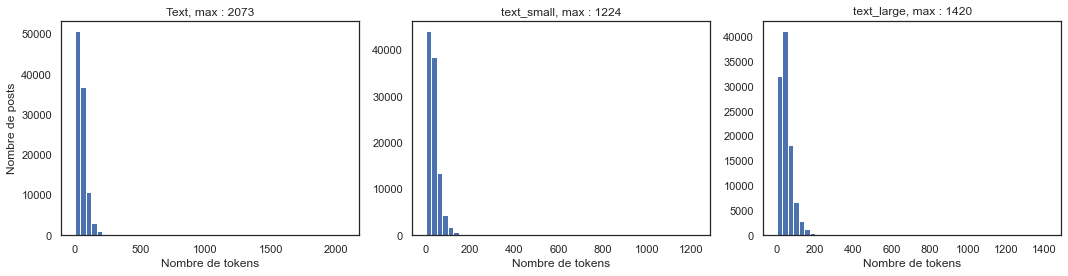

In [32]:
# posts length
plot_posts_length(post, ['Text', 'text_small', 'text_large'])

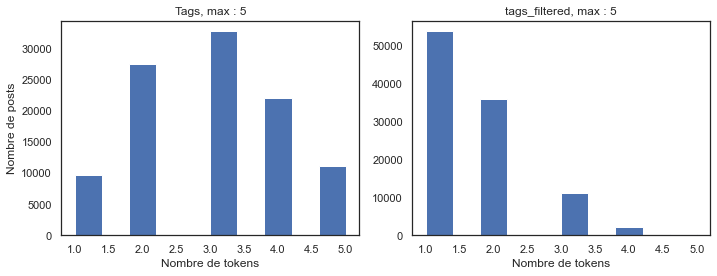

In [33]:
# tags length
plot_posts_length(tag, ['Tags', 'tags_filtered'], bins=10)

# Occurences Post / Tags

## Construction matrice des occurences

In [34]:
#read the pickle file
picklefile = open('train/X_train_filtre.pkl', 'rb')
#unpickle the dataframe
X = pickle5.load(picklefile)
#close file
picklefile.close()

#read the pickle file
picklefile = open('train/Y_train_filtre.pkl', 'rb')
#unpickle the dataframe
Y = pickle5.load(picklefile)
#close file
picklefile.close()

In [35]:
with open('PickleData/tokens_small.pkl', 'rb') as f:
    tokens = pickle.load(f).values

with open('PickleData/tokens_tags_filtered.pkl', 'rb') as f:
    tags = pickle.load(f).values

In [36]:
def build_token_tag_matrix(tokens, tags):
    # matrice m : nb tokens * n : nb tags
    matrix = np.zeros((len(tokens), len(tags)))
    print('Token / Tag matrice créée : {}'.format(matrix.shape))
    # parcours des tags
    for tag in tags:
        doc_index = []
        i_tag = np.where(tags == tag)[0][0]
        #print('tag en cours : {}, i_tag : {}'.format(tag, i_tag))
        for tag_index, tag_doc in Y['tags_filtered'].items():
            #print('tag_index : {}, tag_doc : {}'.format(tag_index, tag_doc))
            if tag in tag_doc:
                doc_index.append(tag_index)
        #print('Index doc comportant tag {}: {}'.format(tag, doc_index))
        for post_index in doc_index:
            post = X['text_small'].loc[post_index]
            # print('---------------------------')
            # print(post)
            for post_token in post:
                i_token = np.where(tokens == post_token)[0][0]
                matrix[i_token, i_tag] += 1
    return matrix

In [37]:
def get_tags_from_token(token):
    # fournit les tags décrivant les documents contenant le token
    i_token = np.where(tokens == token)[0].tolist()
    if len(i_token) == 0:
        print('Token non touvé')
        return
    bow_tags = token_tag_matrix[i_token, :][0].tolist()
    tags_dict = {}
    print('Tags pour le token \'{}\' (occurences)'.format(token, i_token))
    print('10 premiers')
    print('-----------------------------------')
    for i_tags in range(0, len(tags)):
        count_tags = bow_tags[i_tags]
        if count_tags > 0:
            tags_dict[tags[i_tags]] = int(count_tags)
    return pd.Series(tags_dict).sort_values(ascending=False).head(10)

In [38]:
def get_token_from_tags(tag):
    # fournit les tokens présent dans les documents décrit par le tag
    i_tag = np.where(tags == tag)[0].tolist()
    if len(i_tag) == 0:
        print('Tag non touvé')
        return
    bow_tokens = token_tag_matrix[:, i_tag].squeeze()
    print('Tokens pour le tag \'{}\' (occurences)'.format(tag, i_tag))
    print('10 premiers')
    print('-----------------------------------')
    tokens_dict = {}
    for i_tokens in range(0, len(tokens)):
        count_tokens = bow_tokens[i_tokens]
        if count_tokens > 0:
            tokens_dict[tokens[i_tokens]] = int(count_tokens)
    return pd.Series(tokens_dict).sort_values(ascending=False).head(10)

In [39]:
def show_matrix(tokens_slice, tags_slice):
    mat = token_tag_matrix[tokens_slice, tags_slice]
    tokens_sliced = tokens[tokens_slice]
    tags_sliced = tags[tags_slice]
    #ind = np.arange(df_freq_to_plot.shape[0])
    #width = 0.35
    matfig = plt.figure(figsize=(16, 16))
    plt.matshow(mat, fignum=matfig.number)
    plt.xlabel('Tags')
    plt.xticks(range(0, len(tags_sliced)), tags_sliced, rotation=90)
    plt.ylabel('Tokens')
    plt.yticks(range(0, len(tokens_sliced)), tokens_sliced)
    plt.colorbar()

In [40]:
token_tag_matrix = build_token_tag_matrix(tokens, tags)

Token / Tag matrice créée : (4187, 100)


In [41]:
# save matrix
np.save('matrix/token_tag_matrix.npy', token_tag_matrix)

## Utilisation matrice des occurences

In [42]:
# load matrix
token_tag_matrix = np.load('matrix/token_tag_matrix.npy')
print(token_tag_matrix.shape)

(4187, 100)


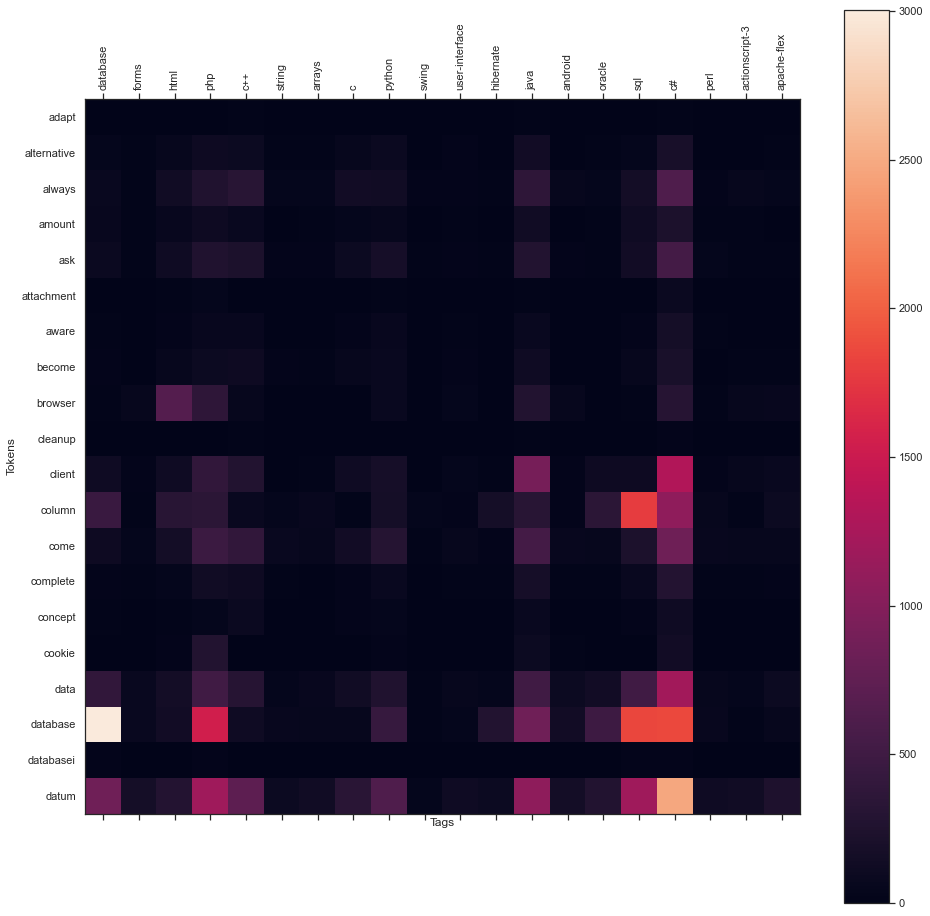

In [43]:
show_matrix(slice(0, 20), slice(0, 20))

In [44]:
print(get_tags_from_token('python'))

Tags pour le token 'python' (occurences)
10 premiers
-----------------------------------
python            6290
django             395
windows            185
c++                179
java               178
linux              174
c                  151
macos              150
php                141
multithreading     139
dtype: int64


In [45]:
print(get_token_from_tags('css'))

Tokens pour le tag 'css' (occurences)
10 premiers
-----------------------------------
css        2880
div        1409
ie         1308
page       1235
image      1202
element     879
html        831
text        754
style       655
browser     620
dtype: int64


## Essai rapide de faisabilité prédiction (Softmax)

In [46]:
tok_dict = corpora.Dictionary(X['text_small'])
tag_dict = corpora.Dictionary(Y['tags_filtered'])

In [47]:
# divise par la somme de la ligne : évite Nan
mat = np.divide(token_tag_matrix, np.sum(token_tag_matrix,
                                         axis=1).reshape((token_tag_matrix.shape[0], 1)))
# softmax appliqué sur les tags de chaque tokens
mat = np.exp(mat) / (np.sum(np.exp(mat), axis=1)).reshape((mat.shape[0], 1))
# divise par la somme de la colonne
mat = np.divide(token_tag_matrix, np.sum(token_tag_matrix, axis=0))

In [48]:
def test(num, mat):
    x = []
    y = []
    pred = []
    for i in range(num):
        # post
        post = X['text_small'].iloc[i]
        x.append(post)
        xbow = tok_dict.doc2bow((post))
        xbow = matutils.sparse2full(xbow, len(tok_dict))
        # prédiction
        y_pred = np.matmul(xbow, mat)
        tags_pred = tags[np.argsort(y_pred)[-3:]]
        pred.append(tags_pred)
        # ground truth
        y.append(Y['tags_filtered'].iloc[i])
    return pd.DataFrame({'post': x, 'tags': y, 'prédiction': pred})

In [49]:
test(50, mat)

,post,tags,prédiction
0,"[store, part, separate, page, whenever, prepar...","[html, database, forms]","[database, database-design, forms]"
1,"[tool, php, web, developer, live, without, lot...",[php],"[web-services, apache, php]"
2,"[long, string, newline, tell, compiler, string...","[c++, string]","[parsing, regex, string]"
3,"[character, pointers, consider, point, area, m...","[c, arrays]","[ms-access, regex, string]"
4,"[install, without, desktop, ubuntu, support, p...",[python],"[macos, python, installation]"
5,"[scala, swing, gui, read, part, programming, s...","[user-interface, swing]","[java, user-interface, swing]"
6,"[place, node, vertically, python, via, diagram...",[python],"[css, python, image]"
7,"[protection, flag, effect, sharing, process, p...",[c],"[winapi, linux, unix]"
8,"[relation, manytomany, attribute, excuse, poor...","[java, hibernate]","[nhibernate, database-design, string]"
9,"[detect, android, software, keyboard, hidden, ...","[java, android]","[iphone, cocoa-touch, android]"
